In [ ]:
import sys
import os
from pathlib import Path

# Add the project root to the Python path
current_path = Path(os.getcwd()).resolve()
project_root = None
# Iterate up from current_path to its parents
for parent_dir in [current_path] + list(current_path.parents):
    if (parent_dir / ".git").is_dir() or (parent_dir / "pyproject.toml").is_file() or (parent_dir / "src").is_dir():
        project_root = parent_dir
        break

if project_root is None:
    # Fallback if no marker is found - assumes notebook is in a subdir of project root
    print("Warning: Could not reliably find project root using markers (.git, pyproject.toml, src/).")
    if current_path.name == "notebooks":
        project_root = current_path.parent
    else:
        project_root = current_path 
        print(f"Warning: Using current working directory as potential project root: {project_root}")

if project_root:
    project_root_str = str(project_root)
    if project_root_str not in sys.path:
        sys.path.insert(0, project_root_str)
        print(f"Project root '{project_root_str}' added to sys.path.")
    else:
        print(f"Project root '{project_root_str}' is already in sys.path.")
else:
    print("Error: Project root could not be determined. Imports from 'src' may fail.")

Project root '/workspaces/photo_tag_pipeline' added to sys.path.


# Photo‑Tag Dataset EDA
Exploratory analysis for multi‑label COCO subset.

In [ ]:
import fiftyone as fo
import importlib
import src.config
import src.data.loader
importlib.reload(src.config)
importlib.reload(src.data.loader)
from src.data.loader import prepare_dataset 
from src.config import DEFAULT_CLASSES 

# Prepare dataset will download, filter, split, export, and write metadata
views = prepare_dataset(classes=DEFAULT_CLASSES, max_samples=20, seed=42)

# Print the number of samples in each split
print("Dataset split sizes:")
for split_name, view in views.items():
    print(f"- {split_name}: {len(view)} samples")

# The views dictionary contains 'train', 'val', 'test' views.
# The underlying dataset can be accessed from any view, e.g., views['train']._dataset
# This dataset object contains all samples and the tags for splits.
dataset = views['train']._dataset
print(f"\nTotal samples in the dataset: {len(dataset)}")
print(f"Dataset name in FiftyOne: {dataset.name}")


/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[INFO] Downloading splits ('train', 'validation', 'test') from coco-2017 (max 20 samples each)…


[INFO] Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


[INFO] Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [25.3s elapsed, 0s remaining, 66.2Mb/s]      


[INFO]  100% |██████|    1.9Gb/1.9Gb [25.3s elapsed, 0s remaining, 66.2Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


[INFO] Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


[INFO] Downloading 20 images


 100% |████████████████████| 20/20 [2.7s elapsed, 0s remaining, 7.3 images/s]       


[INFO]  100% |████████████████████| 20/20 [2.7s elapsed, 0s remaining, 7.3 images/s]       


Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


[INFO] Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


[INFO] Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


[INFO] Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


[INFO] Downloading 20 images


 100% |████████████████████| 20/20 [2.9s elapsed, 0s remaining, 9.8 images/s]       


[INFO]  100% |████████████████████| 20/20 [2.9s elapsed, 0s remaining, 9.8 images/s]       


Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


[INFO] Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


[INFO] Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


[WARNING] Test split is unlabeled; ignoring classes requirement


[INFO] Downloading test info to '/root/fiftyone/coco-2017/tmp-download/image_info_test2017.zip'


 100% |██████|    8.7Mb/8.7Mb [908.7ms elapsed, 0s remaining, 9.6Mb/s]      


[INFO]  100% |██████|    8.7Mb/8.7Mb [908.7ms elapsed, 0s remaining, 9.6Mb/s]      


Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


[INFO] Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


[INFO] Downloading 20 images


 100% |████████████████████| 20/20 [2.7s elapsed, 0s remaining, 7.4 images/s]       


[INFO]  100% |████████████████████| 20/20 [2.7s elapsed, 0s remaining, 7.4 images/s]       


Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


[INFO] Writing annotations for 20 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


[INFO] Dataset info written to '/root/fiftyone/coco-2017/info.json'


You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


[WARNING] You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


Loading 'coco-2017' split 'train'


[INFO] Loading 'coco-2017' split 'train'


 100% |███████████████████| 20/20 [123.2ms elapsed, 0s remaining, 162.4 samples/s]    


[INFO]  100% |███████████████████| 20/20 [123.2ms elapsed, 0s remaining, 162.4 samples/s]    


Loading 'coco-2017' split 'validation'


[INFO] Loading 'coco-2017' split 'validation'


 100% |███████████████████| 20/20 [124.4ms elapsed, 0s remaining, 162.7 samples/s]    


[INFO]  100% |███████████████████| 20/20 [124.4ms elapsed, 0s remaining, 162.7 samples/s]    


Loading 'coco-2017' split 'test'


[INFO] Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


[WARNING] Dataset is unlabeled; ignoring classes requirement


 100% |███████████████████| 20/20 [16.2ms elapsed, 0s remaining, 1.2K samples/s]     


[INFO]  100% |███████████████████| 20/20 [16.2ms elapsed, 0s remaining, 1.2K samples/s]     


Dataset 'coco-2017-train-validation-test-20' created


[INFO] Dataset 'coco-2017-train-validation-test-20' created
[INFO] Loaded 60 samples in total
[INFO] Filtering dataset to 2 target classes
[INFO] View retains 40 samples after label filtering
[INFO] Creating train/val/test tags (seed=42)…
[INFO] Exporting train split → /workspaces/photo_tag_pipeline/.data/coco_export/train (COCO) …


 100% |███████████████████| 51/51 [1.7s elapsed, 0s remaining, 27.2 samples/s]         


[INFO]  100% |███████████████████| 51/51 [1.7s elapsed, 0s remaining, 27.2 samples/s]         
[INFO] Exporting val split → /workspaces/photo_tag_pipeline/.data/coco_export/val (COCO) …


 100% |█████████████████████| 6/6 [215.3ms elapsed, 0s remaining, 27.9 samples/s]      


[INFO]  100% |█████████████████████| 6/6 [215.3ms elapsed, 0s remaining, 27.9 samples/s]      
[INFO] Exporting test split → /workspaces/photo_tag_pipeline/.data/coco_export/test (COCO) …


 100% |███████████████████| 27/27 [871.4ms elapsed, 0s remaining, 31.0 samples/s]      


[INFO]  100% |███████████████████| 27/27 [871.4ms elapsed, 0s remaining, 31.0 samples/s]      
[INFO] Metadata saved → /workspaces/photo_tag_pipeline/src/data/coco/dataset_metadata.json


Dataset split sizes:
- train: 51 samples
- val: 6 samples
- test: 27 samples

Total samples in the dataset: 60
Dataset name in FiftyOne: coco-2017-train-validation-test-20


In [ ]:
# Launch the FiftyOne App to explore the entire dataset.
session = fo.launch_app(dataset)
# pass a specific view:
# session = fo.launch_app(views['train'])


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.5.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



[INFO] 
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.5.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



Successfully loaded /workspaces/photo_tag_pipeline/.data/coco_export/train/labels.json

COCO Dataset Analysis (from /workspaces/photo_tag_pipeline/.data/coco_export/train/labels.json)
Dataset info: 2017/09/01
Number of categories: 37
Categories: ['airplane', 'backpack', 'bed', 'bench', 'bicycle', 'boat', 'book', 'bottle', 'bowl', 'car', 'cat', 'chair', 'couch', 'cow', 'cup', 'dining table', 'dog', 'fork', 'frisbee', 'handbag', 'knife', 'laptop', 'person', 'potted plant', 'remote', 'sheep', 'sink', 'skateboard', 'skis', 'spoon', 'suitcase', 'surfboard', 'teddy bear', 'toothbrush', 'truck', 'tv', 'umbrella']

Valid Images Analysis
Number of valid images with filename: 51
Sample of valid images:
ID: 1, Filename: 000000571342.jpg, Size: 375x500
ID: 2, Filename: 000000307073.jpg, Size: 640x428
ID: 3, Filename: 000000488014.jpg, Size: 640x480
ID: 4, Filename: 000000299154.jpg, Size: 640x458
ID: 5, Filename: 000000430501.jpg, Size: 640x427

Image Dimensions Statistics:
Height - Min: 331, Max:

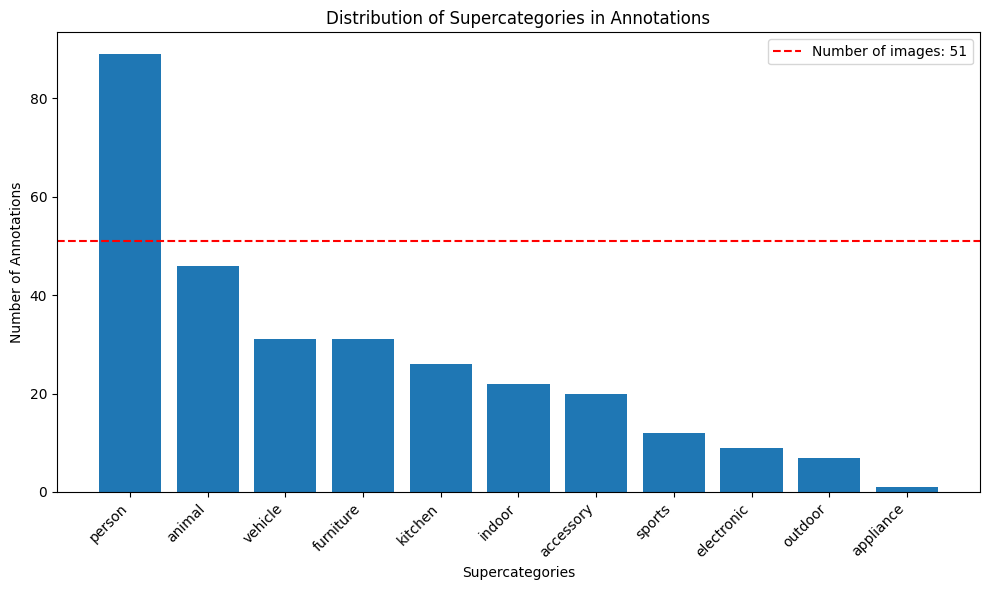

In [ ]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import importlib 
import src.config 
importlib.reload(src.config) 

# Define the path to the training annotations file
train_ann_file_path = src.config.DATASET_ROOT / "train" / "labels.json"

# Load COCO data from the training split's exported labels.json
coco_data = {} # Initialize to empty dict

with open(train_ann_file_path, 'r') as f:
    coco_data = json.load(f)
print(f"Successfully loaded {train_ann_file_path}")

# Basic dataset information
print(f"\nCOCO Dataset Analysis (from {train_ann_file_path})")
print(f"===========================")
# Check if coco_data was loaded successfully before trying to access its keys
if coco_data:
    print(f"Dataset info: {coco_data.get('info', {}).get('date_created', 'Not specified')}")
    print(f"Number of categories: {len(coco_data.get('categories', []))}")
    print(f"Categories: {[cat['name'] for cat in coco_data.get('categories', [])]}")

    # Get valid images (with id and file_name)
    valid_images = []
    for img in coco_data.get('images', []):
        if 'file_name' in img and 'id' in img:
            valid_images.append((img['id'], img['file_name'], img.get('height'), img.get('width')))

    print(f"\nValid Images Analysis")
    print(f"===========================")
    print(f"Number of valid images with filename: {len(valid_images)}")
    if valid_images:
        print("Sample of valid images:")
        for i, (img_id, filename, height, width) in enumerate(valid_images[:5]):
            print(f"ID: {img_id}, Filename: {filename}, Size: {width}x{height}")

    # Analyze image dimensions if available
    heights = [h for _, _, h, _ in valid_images if h is not None and isinstance(h, (int, float))]
    widths = [w for _, _, _, w in valid_images if w is not None and isinstance(w, (int, float))]

    if heights and widths:
        print(f"\nImage Dimensions Statistics:")
        print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Avg: {sum(heights)/len(heights):.1f}")
        print(f"Width  - Min: {min(widths)}, Max: {max(widths)}, Avg: {sum(widths)/len(widths):.1f}")

    # Count supercategories in annotations
    print(f"\nAnnotations Analysis")
    print(f"===========================")
    if 'annotations' in coco_data:
        annotations = coco_data['annotations']
        print(f"Number of annotations: {len(annotations)}")
        
        # Count by supercategory
        supercategories = [ann.get('supercategory') for ann in annotations if 'supercategory' in ann]
        if supercategories: # Check if list is not empty
            supercategory_counts = Counter(supercategories)
            
            print("\nSupercategory distribution:")
            for cat, count in supercategory_counts.most_common():
                print(f"{cat}: {count} annotations ({count/len(supercategories)*100:.1f}%)")
            
            if supercategory_counts:
                # Plot supercategory distribution
                plt.figure(figsize=(10, 6))
                cats, counts = zip(*supercategory_counts.most_common())
                plt.bar(cats, counts)
                plt.xlabel('Supercategories')
                # Only plot horizontal line if valid_images is not empty
                if valid_images:
                    plt.axhline(y=len(valid_images), color='r', linestyle='--', label=f'Number of images: {len(valid_images)}')
                    plt.legend()
                plt.ylabel('Number of Annotations')
                plt.title('Distribution of Supercategories in Annotations')
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                plt.show()
        else:
            print("No supercategory information found in annotations.")
else:
    print("Skipping COCO data analysis as coco_data could not be loaded.")


In [ ]:
# Export notebook to HTML

# Add this tag to the cell metadata to exclude it from exports
# Add the following to the cell metadata: {"tags": ["remove_cell"]}

import nbformat
from nbconvert import HTMLExporter
import os

# Get the current notebook name
notebook_path = "01_dataset_eda.ipynb"
html_path = notebook_path.replace(".ipynb", ".html")

# Load the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Create HTMLExporter
html_exporter = HTMLExporter()
html_exporter.exclude_tag_names = ['remove']  # This will exclude cells with 'remove_cell' tag

# Convert to HTML
(body, resources) = html_exporter.from_notebook_node(notebook)

# Write to HTML file
with open(html_path, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Notebook exported to {html_path}")

FileNotFoundError: [Errno 2] No such file or directory: 'MLG-LB02_LabDT-EM.ipynb'